CAMELS basins have many multi polygons/geometries. These can be identified as independent basins when creating the mesh file. But most multi polygons are very small, outside the major domain area. Here, the multi polygon area is analyzed.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
file4 = '/Users/guoqiang/Research/CTSM/CAMELS_basins/HCDN_nhru_final_671.gpkg'
shp4 = gpd.read_file(file4)

In [3]:
num = len(shp4)
ratio = np.zeros([num, 2])
ratio[:,1]=1
for i in range(num):
    shpi = shp4[i:i+1]
    shpi = list(shpi.geometry.iloc[0])
    if len(shpi)==1:
        ratio[i,0]=1
    else:
        r = np.zeros(len(shpi))
        for j in range(len(shpi)):
            r[j] = shpi[j].area
        ratio[i,0] = np.max(r)/np.sum(r)
        ratio[i,1] = len(shpi)

Text(0.5, 1.0, 'Number of multi geometry/polygon')

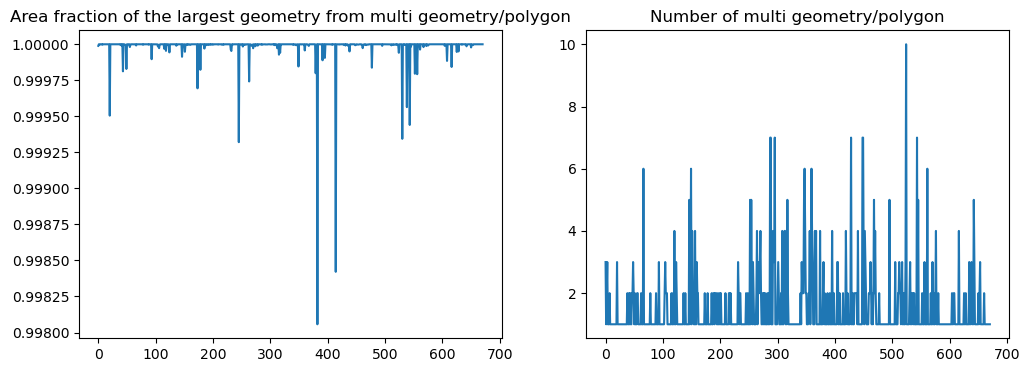

In [4]:
fig,axs=plt.subplots(1,2,figsize=[12, 4])

axs[0].plot(ratio[:,0])
axs[0].set_title('Area fraction of the largest geometry from multi geometry/polygon')

axs[1].plot(ratio[:,1])
axs[1].set_title('Number of multi geometry/polygon')
